# Welcome to the AI Model Workshop
![The Galaxy Brain Hexfecta by David Llanio](https://i.imgur.com/oMN4ZZ6.png)

We will be using this [insurance dataset](https://www.kaggle.com/mirichoi0218/insurance)

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

insurDf = pd.read_csv('insurance.csv')
insuranceDf = pd.get_dummies(insurDf, columns=['smoker','region','sex'])

insuranceDf.head()


,age,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,0,16884.92400,0,1,0,0,0,1,1,0
1,18,33.770,1,1725.55230,1,0,0,0,1,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0,0,0,1
4,32,28.880,0,3866.85520,1,0,0,1,0,0,0,1


In [ ]:
insuranceDf.shape

(1338, 12)

In [ ]:
from sklearn.model_selection import train_test_split

y = insuranceDf['charges']
X = insuranceDf.drop(columns=['charges'])

In [ ]:
X.shape

(1338, 11)

In [ ]:
y.shape

(1338,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
# X
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# y
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1137, 11)
X_test shape: (201, 11)
y_train shape: (1137,)
y_test shape: (201,)


## Linear Regression

Reference: 
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://deepai.org/machine-learning-glossary-and-terms/linear-regression

![](https://miro.medium.com/max/1600/1*34dYVwi1ieVQBtwKd4xReg.gif)

In [ ]:
# y_test.head()
X_test['age'].head()

578     52
610     47
569     48
1034    61
198     51
Name: age, dtype: int64

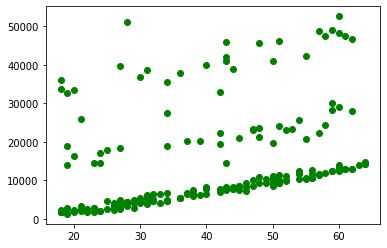

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression Model

regressorLin = LinearRegression().fit(X_train, y_train)
y_pred = regressorLin.predict(X_test)

# Plotting
plt.scatter(X_test['age'], y_test, color='green')

plt.show()

In [ ]:
resultsDf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
resultsDf.head()

,Actual,Predicted
578,9724.53000,11074.045717
610,8547.69130,9520.175933
569,45702.02235,38146.680705
1034,12950.07120,16134.884002
198,9644.25250,6937.690260


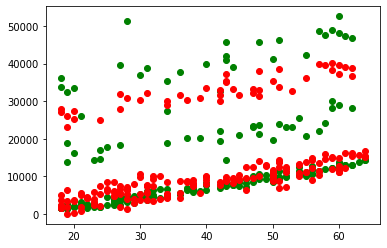

In [ ]:
# Plotting
plt.scatter(X_test['age'], y_test, color='green')
plt.scatter(X_test['age'] ,resultsDf['Predicted'], color='red')

plt.show()

## Random Forest Regression

Reference:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://deepai.org/machine-learning-glossary-and-terms/random-forest

![Decision Tree](https://lh5.googleusercontent.com/cbVP3soFqK97RdfNp3uHGUsU9ZfWYBemZEHGSUhegVcqffb-QGYT---Y9IDFMHGi5uHCdYIX4xtmICoNx9UCuoEYWsFCzut2sbnnssd_d_jkQv5t5cIHd-beiA74D0CllHVDlY1tCT4cu6pGOg)

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

# Random Forest Rgressor with 10 trees
regressorForest = RandomForestRegressor(n_estimators=10, random_state=0)
regressorForest.fit(X_train,y_train)

forest_y_predict = regressorForest.predict(X_test)

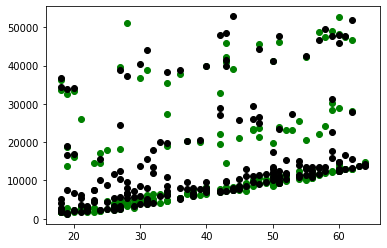

In [ ]:
# Visualizing
plt.scatter(X_test['age'], y_test, color = 'green')
plt.scatter(X_test['age'], forest_y_predict, color='black')

plt.show()

In [ ]:
# Same Random Forest Regressor but with 100 trees
regressorForest = RandomForestRegressor(n_estimators=100, random_state=0)
regressorForest.fit(X_train,y_train)

forest_y_predict = regressorForest.predict(X_test)

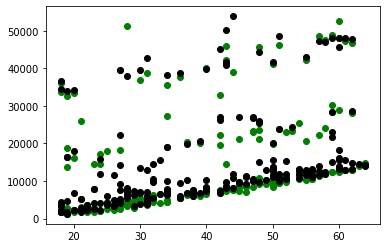

In [ ]:
# Visualizing
plt.scatter(X_test['age'], y_test, color = 'green')
plt.scatter(X_test['age'], forest_y_predict, color='black')

plt.show()

## Gradient Boosting Regression

Reference: 
- https://deepai.org/machine-learning-glossary-and-terms/gradient-boosting
- https://tinyurl.com/45bou6jd 

In [ ]:
# Importing the required packages
import xgboost as xgb

In [ ]:
# Creating the model
# xgb_model = xgb.XGBRegressor(
#     n_estimators=50,
#     max_depth=12,
#     learning_rate=0.10,
#     booster='gblinear',
#     verbosity=0,
# )

xgb_model = xgb.XGBRegressor(
    n_estimators=800,
    max_depth=12,
    learning_rate=0.001,
    booster='gblinear',
    verbosity=0,
)

xgb_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='mae',early_stopping_rounds=10)

[0]	validation_0-mae:13939.47266
[1]	validation_0-mae:13854.57422
[2]	validation_0-mae:13770.20898
[3]	validation_0-mae:13686.37793
[4]	validation_0-mae:13603.07617
[5]	validation_0-mae:13520.29883
[6]	validation_0-mae:13438.04492
[7]	validation_0-mae:13356.30859
[8]	validation_0-mae:13275.08984
[9]	validation_0-mae:13194.38477
[10]	validation_0-mae:13114.18359
[11]	validation_0-mae:13034.49219
[12]	validation_0-mae:12955.30371
[13]	validation_0-mae:12876.61719
[14]	validation_0-mae:12798.42285
[15]	validation_0-mae:12720.71875
[16]	validation_0-mae:12643.50977
[17]	validation_0-mae:12566.78613
[18]	validation_0-mae:12490.55469
[19]	validation_0-mae:12414.79688
[20]	validation_0-mae:12339.79394
[21]	validation_0-mae:12265.54883
[22]	validation_0-mae:12191.77148
[23]	validation_0-mae:12118.46289
[24]	validation_0-mae:12046.12305
[25]	validation_0-mae:11976.46289
[26]	validation_0-mae:11907.60156
[27]	validation_0-mae:11839.18945
[28]	validation_0-mae:11772.32324
[29]	validation_0-mae:11

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.001, max_delta_step=None, max_depth=12,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=4, num_parallel_tree=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=0)

In [ ]:
xgby_preds = xgb_model.predict(X_test)

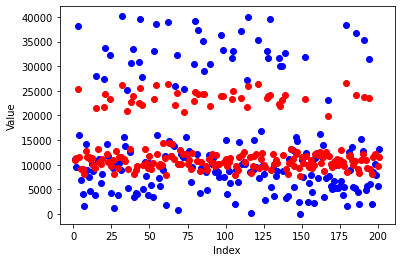

In [ ]:
plt.plot(range(1,len(y_test) + 1), y_pred, 'bo')
plt.plot(range(1,len(y_test) + 1), xgby_preds, 'ro')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

## Neural Network

Reference: 
- https://deepai.org/machine-learning-glossary-and-terms/feed-forward-neural-network 
- https://keras.io/guides/sequential_model/  
- https://keras.io/api/layers/core_layers/dense/ 

![NeuralNetworkOverview](https://images.deepai.org/django-summernote/2019-06-06/5c17d9c2-0ad4-474c-be8d-d6ae9b094e74.png)

In [ ]:
# Importing the required packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X_train.shape

(1137, 11)

In [ ]:
X_test.shape

(201, 11)

In [ ]:
# Creating the model
nn_model = keras.Sequential()
nn_model.add(layers.Dense(32,activation='relu',input_shape=(11,),name='Input'))
nn_model.add(layers.Dense(32,activation='relu',name='Hidden'))
nn_model.add(layers.Dense(1,name='Output'))

In [ ]:
# Overview of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 32)                384       
_________________________________________________________________
Hidden (Dense)               (None, 32)                1056      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
nn_model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

# Training the model
history = nn_model.fit(x=X_train,y=y_train,batch_size=32,epochs=50,verbose=1,validation_data=(X_test,y_test))

Epoch 1/50
36/36 [==============================] - 1s 5ms/step - loss: 298615527.7838 - mae: 12898.6284 - val_loss: 362228512.0000 - val_mae: 13988.4697
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 299441647.5676 - mae: 12832.5214 - val_loss: 360804320.0000 - val_mae: 13941.6963
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 294800018.1622 - mae: 12635.5956 - val_loss: 358850592.0000 - val_mae: 13877.1914
Epoch 4/50
36/36 [==============================] - 0s 1ms/step - loss: 285474068.3243 - mae: 12461.2636 - val_loss: 356115168.0000 - val_mae: 13786.1562
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 333299744.0000 - mae: 13552.0776 - val_loss: 352658496.0000 - val_mae: 13670.1455
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: 278512710.4865 - mae: 12362.8255 - val_loss: 348051584.0000 - val_mae: 13513.9053
Epoch 7/50
36/36 [==============================] - 0s 2ms/step - loss: 3001

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

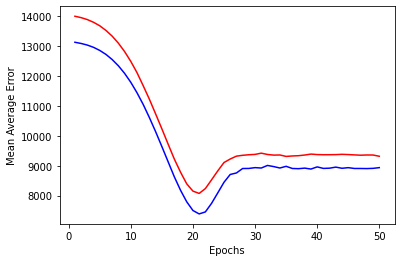

In [ ]:
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'],color='b')
plt.plot(range(1, len(history.history['mae']) + 1), history.history['val_mae'],color='r')
plt.xlabel('Epochs')
plt.ylabel('Mean Average Error')
plt.show()

In [ ]:
history2 = nn_model.fit(x=X_train,y=y_train,batch_size=32,epochs=250,verbose=1,validation_data=(X_test,y_test))

Epoch 1/250
36/36 [==============================] - 0s 3ms/step - loss: 125554080.0000 - mae: 8873.6523 - val_loss: 140213648.0000 - val_mae: 9294.4307
Epoch 2/250
36/36 [==============================] - 0s 2ms/step - loss: 125411800.0000 - mae: 8866.2080 - val_loss: 139839120.0000 - val_mae: 9329.2998
Epoch 3/250
36/36 [==============================] - 0s 2ms/step - loss: 125286592.0000 - mae: 8866.8691 - val_loss: 139523168.0000 - val_mae: 9357.1758
Epoch 4/250
36/36 [==============================] - 0s 2ms/step - loss: 125203520.0000 - mae: 8925.3545 - val_loss: 139410768.0000 - val_mae: 9349.0518
Epoch 5/250
36/36 [==============================] - 0s 2ms/step - loss: 125102968.0000 - mae: 8935.3301 - val_loss: 139370096.0000 - val_mae: 9329.3721
Epoch 6/250
36/36 [==============================] - 0s 2ms/step - loss: 124946600.0000 - mae: 8887.6270 - val_loss: 139290528.0000 - val_mae: 9315.2529
Epoch 7/250
36/36 [==============================] - 0s 2ms/step - loss: 124863936

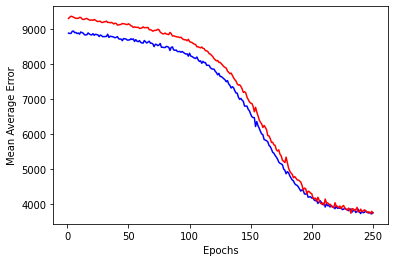

In [ ]:
plt.plot(range(1, len(history2.history['mae']) + 1), history2.history['mae'],color='b')
plt.plot(range(1, len(history2.history['mae']) + 1), history2.history['val_mae'],color='r')
plt.xlabel('Epochs')
plt.ylabel('Mean Average Error')
plt.show()

In [ ]:
insuranceDf.shape

(1338, 12)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4eb18ce-25fd-4868-8b27-20f740f121d7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>